In [ ]:
!pip install numpy
!pip install pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import os
import keras

os.environ["KERAS_BACKEND"] = "tensorflow"
print(keras.__version__)


3.10.0


In [ ]:
df = pd.DataFrame(columns=['Name', 'Origin'])
dirname = '/content/drive/MyDrive/Colab_Notebooks_main/new_born/data/train'
filenames = os.listdir(dirname)
for filename in filenames:
  file = open(f'{dirname}/{filename}', 'r')
  lines = file.readlines()
  country = filename.split('.')[0]
  for line in lines:
    name = line.strip()  # Remove leading/trailing whitespace
    df.loc[len(df)] = [name, country] # Add name and country to the dataframe

display(df.head())

,Name,Origin
0,Abe,Japanese
1,Abukara,Japanese
2,Adachi,Japanese
3,Aida,Japanese
4,Aihara,Japanese


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks_main/new_born/data/test.csv")
test

,Name
0,Feng
1,Tchekhlakovsky
2,Khouri
3,Janov
4,Oquendo
...,...
999,Acerbi
1000,Murygin
1001,Absattarov
1002,Eyre


In [ ]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 3.0 MB/s eta 0:00:00


In [ ]:
import string
import unicodedata
from unidecode import unidecode

chars = string.ascii_lowercase
longest_string = df['Name'].str.len().max()
df["Name"] = df["Name"].str.lower()

def latin_to_ascii(text):
    return ''.join(
        c for c in unicodedata.normalize('NFKD', text)
        if not unicodedata.combining(c)
    )

def keep_letters_only(text):
    return ''.join(c for c in text if c.isalpha())

def encode(my_word, chars = chars, max_len = longest_string):
        char_indices = dict((c, i) for i, c in enumerate(chars))
        my_word_ascii = unidecode(my_word) # Convert to ASCII
        my_word_ascii = keep_letters_only(my_word_ascii) # Remove non-letter characters
        x = np.zeros((max_len, len(chars)))
        for i, c in enumerate(my_word_ascii):
            x[i, char_indices[c]] = 1
        return x

def decode(x, chars, calc_argmax = True):
    indices_char = dict((i, c) for i, c in enumerate(chars))
    if calc_argmax:
        x = x.argmax(axis=-1)
    return ''.join(indices_char[x] for x in x)

In [ ]:
df['Name']

,Name
0,abe
1,abukara
2,adachi
3,aida
4,aihara
...,...
20069,younis
20070,youssouf
20071,yule
20072,yusuf


In [ ]:
def apply_encode(words_list, chars = chars, max_len = longest_string):
  words_list = words_list.str.lower().to_list()
  x = np.zeros((len(words_list), max_len, len(chars)))
  for i, word in enumerate(words_list):
    x[i] = encode(word, chars, max_len)
  return x

X = apply_encode(df['Name'])
X

array([[[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
test_x = apply_encode(test['Name'])
test_x

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
labels = ["Arabic", "Chinese", "Czech", "Dutch", "English", "French", "German", "Greek", "Irish", "Italian", "Japanese", "Korean", "Polish", "Portuguese", "Russian", "Scottish", "Spanish", "Vietnamese"]
def encode_y(samples, labels):
  map = dict((label, i) for i, label in enumerate(labels))
  y = np.zeros((len(samples), len(labels)))
  for i, sample in enumerate(samples):
    y[i, map[sample]] = 1
  return y

y = encode_y(df['Origin'], labels)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, Input, LSTM, BatchNormalization, GRU
from keras.optimizers import Adam
from keras.losses import  categorical_crossentropy

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import f1_score, roc_auc_score

auc = keras.metrics.AUC(multi_label=True)

model = Sequential()
model.add(Input(shape=(longest_string, len(chars))))
model.add(GRU(128, dropout=0.2, recurrent_dropout= 0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(len(labels) ,activation="softmax"))



model.compile(loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy", auc])

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    "/content/drive/MyDrive/Colab_Notebooks_main/new_born/modelbest_model.keras",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=False
)

# f1_callback = F1ScoreCallback(validation_data=(X_val, y_val))

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.4605 - auc_1: 0.5419 - loss: 2.0641 - val_accuracy: 0.5433 - val_auc_1: 0.6921 - val_loss: 1.5941
Epoch 2/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.5018 - auc_1: 0.6536 - loss: 1.6488 - val_accuracy: 0.5578 - val_auc_1: 0.7237 - val_loss: 1.5257
Epoch 3/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.5296 - auc_1: 0.6702 - loss: 1.5846 - val_accuracy: 0.5762 - val_auc_1: 0.7697 - val_loss: 1.4450
Epoch 4/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.5469 - auc_1: 0.6968 - loss: 1.5285 - val_accuracy: 0.5941 - val_auc_1: 0.7756 - val_loss: 1.3573
Epoch 5/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.5662 - auc_1: 0.7339 - loss: 1.4616 - val_accuracy: 0.6210 - val_auc_1: 0.7914 - val_loss: 1.2927
Epoch 6/50
283/283 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.5959 - auc_1: 0.7380 - loss: 1.3999 - val_accuracy: 0.6564 - val_auc_1: 0.8249 - val_loss: 1.2306
Epoc

In [ ]:
from tensorflow import keras

model = keras.models.load_model("/content/drive/MyDrive/Colab_Notebooks_main/new_born/modelbest_model.keras")
test_loss, test_acc, test_auc = model.evaluate(X_valid, y_valid)

print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8309 - auc_1: 0.9117 - loss: 0.5456
Test Accuracy: 0.8277
Test AUC: 0.9553


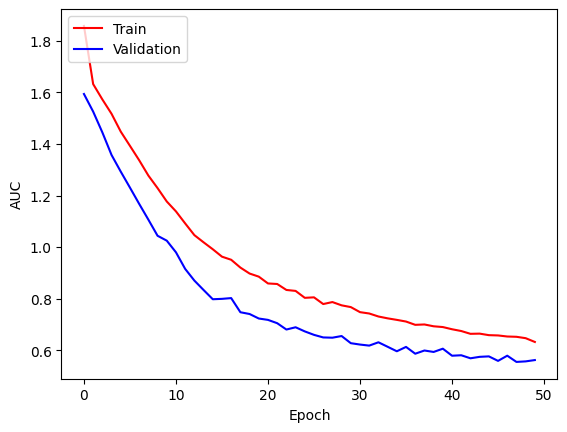

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(test_x)
y_pred_classes = np.argmax(y_pred, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [ ]:
submission = pd.DataFrame(y_pred_classes, columns=["prediction"])
submission

,prediction
0,1
1,14
2,0
3,14
4,9
...,...
999,9
1000,14
1001,14
1002,4
